<a href="https://colab.research.google.com/github/Egemenozkurt/ForecastingWeather/blob/main/Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
import plotly.express as px

In [ ]:
ds = pd.read_csv('Istanbul_Weather_Data.csv')
ds

,DateTime,Condition,Rain,MaxTemp,MinTemp,SunRise,SunSet,MoonRise,MoonSet,AvgWind,AvgHumidity,AvgPressure,AvgTemp
0,01.01.2009,Partly cloudy,0.23,5,2,8:29:00,17:47:00,11:09:00,22:39:00,10,90,1027,3.5
1,02.01.2009,Overcast,4.48,4,1,8:29:00,17:48:00,11:30:00,23:43:00,12,89,1021,2.5
2,03.01.2009,Overcast,0.08,5,3,8:29:00,17:48:00,11:52:00,NaN,16,94,1021,4.0
3,04.01.2009,Mist,2.91,5,3,8:29:00,17:49:00,0:15:00,12:48:00,9,94,1014,4.0
4,05.01.2009,Overcast,4.32,5,3,8:29:00,17:50:00,0:41:00,1:57:00,15,97,1015,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3891,29.08.2019,Partly cloudy,0.00,27,23,6:27:00,19:43:00,4:47:00,19:26:00,24,61,1015,25.0
3892,30.08.2019,Partly cloudy,0.00,27,22,6:29:00,19:42:00,6:04:00,20:05:00,20,64,1016,24.5
3893,31.08.2019,Patchy rain possible,0.50,26,22,6:30:00,19:40:00,7:21:00,20:40:00,22,63,1015,24.0
3894,01.09.2019,Partly cloudy,0.00,27,22,6:31:00,19:38:00,8:37:00,21:13:00,21,66,1011,24.5


In [ ]:
figure = px.line(ds, x="DateTime", 
                 y="AvgTemp", 
                 title='Tempature in Istanbul Over the Years')
figure.show()

In [ ]:
figure = px.line(ds, x="DateTime", 
                 y="Rain", 
                 title='Rain in Istanbul Over the Years')
figure.show()

In [ ]:
figure = px.line(ds, x="DateTime", 
                 y="AvgHumidity", 
                 title='Humidity in Istanbul Over the Years')
figure.show()

In [ ]:
figure = px.line(ds, x="DateTime", 
                 y="AvgWind", 
                 title='Wind Speed in Istanbul Over the Years')
figure.show()

In [ ]:
ds["DateTime"] = pd.to_datetime(ds["DateTime"], format = '%d.%m.%Y')
ds["month"] = ds["DateTime"].dt.month
ds['year'] = ds['DateTime'].dt.year
print(ds.head())

    DateTime      Condition  Rain  MaxTemp  MinTemp  SunRise    SunSet  \
0 2009-01-01  Partly cloudy  0.23        5        2  8:29:00  17:47:00   
1 2009-01-02       Overcast  4.48        4        1  8:29:00  17:48:00   
2 2009-01-03       Overcast  0.08        5        3  8:29:00  17:48:00   
3 2009-01-04           Mist  2.91        5        3  8:29:00  17:49:00   
4 2009-01-05       Overcast  4.32        5        3  8:29:00  17:50:00   

   MoonRise   MoonSet  AvgWind  AvgHumidity  AvgPressure  month  year  
0  11:09:00  22:39:00       10           90         1027      1  2009  
1  11:30:00  23:43:00       12           89         1021      1  2009  
2  11:52:00       NaN       16           94         1021      1  2009  
3   0:15:00  12:48:00        9           94         1014      1  2009  
4   0:41:00   1:57:00       15           97         1015      1  2009  


ValueError: ignored

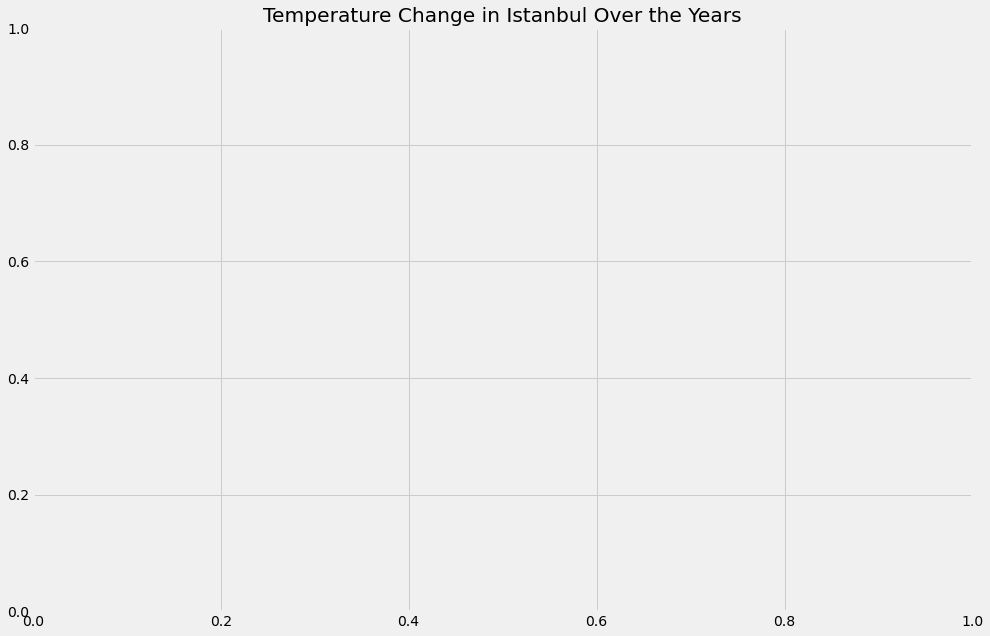

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.title("Temperature Change in Istanbul Over the Years")
sns.lineplot(data = ds, x='month', y='AvgTemp', hue='year')
plt.show()

In [ ]:
figure = px.scatter(data_frame = ds, x="AvgHumidity",
                    y="AvgTemp", size="AvgHumidity", 
                    trendline="ols", 
                    title = "Relationship Between Temperature and Humidity")
figure.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
datasetforx = pd.DataFrame({'Rain': ds.Rain,'MaxTemp':ds.MaxTemp,'MinTemp':ds.MinTemp,'AvgWind':ds.AvgWind,'AvgHumidity':ds.AvgHumidity,'AvgPressure':ds.AvgPressure})
Xfirst = pd.DataFrame(data=datasetforx)
datasetforx.head()
encodedCondition = le.fit_transform(ds.Condition)
datasetforx.insert(0,'Condition',encodedCondition)
TestDateTime=ds.DateTime[2922:3896]
x1 = Xfirst.drop(columns=['MaxTemp'])
x2 = Xfirst.drop(columns=['MinTemp'])
y1 = ds.iloc[:,3]
y2 = ds.iloc[:,4]


In [ ]:
x3 = datasetforx.drop(columns=['Condition'])
y3 = datasetforx.Condition
X3_train, X3_test, y3_train, y3_test = train_test_split(x3, y3, test_size = 0.25, random_state = 0, shuffle = False)


      Rain  MaxTemp  MinTemp  AvgWind  AvgHumidity  AvgPressure
0     0.23        5        2       10           90         1027
1     4.48        4        1       12           89         1021
2     0.08        5        3       16           94         1021
3     2.91        5        3        9           94         1014
4     4.32        5        3       15           97         1015
...    ...      ...      ...      ...          ...          ...
3891  0.00       27       23       24           61         1015
3892  0.00       27       22       20           64         1016
3893  0.50       26       22       22           63         1015
3894  0.00       27       22       21           66         1011
3895  0.00       27       22       23           66         1012

[3896 rows x 6 columns]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.25, random_state = 0, shuffle = False)

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.25, random_state = 0, shuffle = False)

In [ ]:
print(X_train)
print(X_test)

      Rain  MinTemp  AvgWind  AvgHumidity  AvgPressure
0     0.23        2       10           90         1027
1     4.48        1       12           89         1021
2     0.08        3       16           94         1021
3     2.91        3        9           94         1014
4     4.32        3       15           97         1015
...    ...      ...      ...          ...          ...
2917  0.21        5       15           75         1019
2918  7.14        4       54           80         1015
2919  7.11        3       38           88         1022
2920  4.26        2       23           86         1023
2921  3.96        2       14           80         1025

[2922 rows x 5 columns]
      Rain  MinTemp  AvgWind  AvgHumidity  AvgPressure
2922  0.00        3       17           68         1022
2923  0.02        5       21           66         1020
2924  0.04        7       19           74         1016
2925  1.42        9       19           84         1008
2926  5.22       -1       39           8

In [ ]:
print(X2_train)
print(X2_test)

In [ ]:
print(y_train)
print(y_test)

0       5
1       4
2       5
3       5
4       5
       ..
2917    6
2918    6
2919    5
2920    5
2921    4
Name: MaxTemp, Length: 2922, dtype: int64
2922     6
2923     8
2924     9
2925    11
2926    11
        ..
3891    27
3892    27
3893    26
3894    27
3895    27
Name: MaxTemp, Length: 974, dtype: int64


In [ ]:
ytest2 = y_test.array
y2test2 = y2_test.array

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X2_train = sc.fit_transform(X2_train)
X2_test = sc.transform(X2_test)
X3_train = sc.fit_transform(X3_train)
X3_test = sc.transform(X3_test)


In [ ]:
from sklearn.linear_model import LinearRegression
Lreg = LinearRegression().fit(X_train,y_train)
y_predL = Lreg.predict(X_test)
print(Lreg.score(X_test,y_test))

figure = px.line(x = TestDateTime, 
                 y=[ytest2,y_predL],
                 labels={'x':'Years','value':'Maximum Temperatures', 'variable':'Temperatures'},
                 title='Max Tempature in Istanbul Over the Years with Linear Regression')

series_names = ["Real", "Prediction"]

for idx, name in enumerate(series_names):
    figure.data[idx].name = name

figure.show()

0.9391169723552996


In [ ]:
rregr = Ridge(alpha = 0.5)
Rireg = rregr.fit(X_train,y_train)
y_predR = Rireg.predict(X_test)

In [ ]:
print(Rireg.score(X_test,y_test))
figure = px.line(x = TestDateTime, 
                 y=[ytest2,y_predR],
                 labels={'x':'Years','value':'Maximum Temperatures', 'variable':'Temperatures'},
                 title='Max Tempature in Istanbul Over the Years with Ridge Regression')

series_names = ["Real", "Prediction"]

for idx, name in enumerate(series_names):
    figure.data[idx].name = name

figure.show()

0.9391113039068071


In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=0)

RandomForestClassifier(random_state=0)

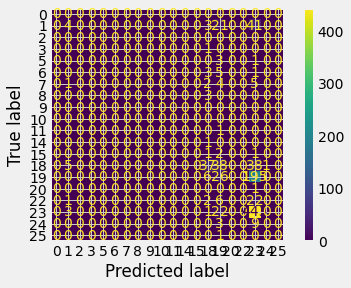

In [ ]:
forpred=forest.predict(X3_test)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y3_test, forpred, labels=forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=forest.classes_)
disp.plot()
plt.show()

In [ ]:

>>> from sklearn.model_selection import cross_val_score
>>> from sklearn.tree import DecisionTreeClassifier
>>> clf = DecisionTreeClassifier(random_state=0)
cross_val_score(clf, X3_train, y3_train, cv=10)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=10.



array([0.59385666, 0.5665529 , 0.54794521, 0.64383562, 0.61643836,
       0.56849315, 0.56506849, 0.61643836, 0.61986301, 0.63356164])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
freg = RandomForestRegressor(random_state=0,n_jobs = -1,max_depth=500,n_estimators=200)
freg.fit(X_train,y_train)
fpred = freg.predict(X_test)
print(mean_squared_error(y_test,fpred), r2_score(y_test,fpred))

figure = px.line(x = TestDateTime, 
                 y=[ytest2,fpred],
                 labels={'x':'Years','value':'Maximum Temperatures', 'variable':'Temperatures'},
                 title='Max Tempature in Istanbul Over the Years with Random Forest')

series_names = ["Real", "Prediction"]

for idx, name in enumerate(series_names):
    figure.data[idx].name = name

figure.show()

4.100588010623431 0.93058924396098


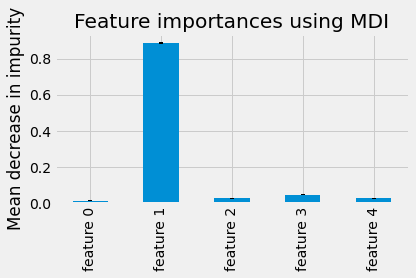

In [ ]:
importances = freg.feature_importances_
std = np.std([tree.feature_importances_ for tree in freg.estimators_], axis=0)
feature_names = [f"feature {i}" for i in range(X_train.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
from sklearn.neural_network import MLPRegressor
Nreg = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)

In [ ]:
print(Nreg.score(X_test,y_test))
ypredN = Nreg.predict(X_test)

figure = px.line(x = TestDateTime, 
                 y=[ytest2,ypredN],
                 labels={'x':'Years','value':'Maximum Temperatures', 'variable':'Temperatures'},
                 title='Max Tempature in Istanbul Over the Years with MLP')

series_names = ["Real", "Prediction"]

for idx, name in enumerate(series_names):
    figure.data[idx].name = name

figure.show()

0.9401584557962992


In [ ]:
from sklearn.svm import LinearSVR
svreg = LinearSVR(random_state=1, tol=1e-5).fit(X_train,y_train)

In [ ]:
print(svreg.score(X_test,y_test))
ypredS = svreg.predict(X_test)
figure = px.line(x = TestDateTime, 
                 y=[ytest2,ypredS],
                 labels={'x':'Years','value':'Maximum Temperatures', 'variable':'Temperatures'},
                 title='Max Tempature in Istanbul Over the Years with LinearSVR')

series_names = ["Real", "Prediction"]

for idx, name in enumerate(series_names):
    figure.data[idx].name = name

figure.show()

0.9487599567153587


In [ ]:
from sklearn import ensemble
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'squared_error'}
gbreg = ensemble.GradientBoostingRegressor(**params)
gbreg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [ ]:
print(gbreg.score(X_test,y_test))
ypredGB = gbreg.predict(X_test)

figure = px.line(x = TestDateTime, 
                 y=[ytest2,ypredGB],
                 labels={'x':'Years','value':'Average Temperatures', 'variable':'Temperatures'},
                 title='Max Tempature in Istanbul Over the Years with ensemble')

series_names = ["Real", "Prediction"]

for idx, name in enumerate(series_names):
    figure.data[idx].name = name

figure.show()

0.9389113138112711


Until now, we tried to predict Maximum Temperature, From now on, we try to predict Minimum Temperature

In [ ]:
Nreg2 = MLPRegressor(random_state=1, max_iter=500).fit(X2_train, y2_train)

In [ ]:
print(Nreg2.score(X2_test,y2_test))
ypredN2 = Nreg2.predict(X2_test)

figure = px.line(x = TestDateTime, 
                 y=[y2test2,ypredN2],
                 labels={'x':'Years','value':'Minimum Temperatures', 'variable':'Temperatures'},
                 title='Minimum Tempature in Istanbul Over the Years with MLP')

series_names = ["Real", "Prediction"]

for idx, name in enumerate(series_names):
    figure.data[idx].name = name

figure.show()

0.9372152477848471


In [ ]:
freg2 = RandomForestRegressor(random_state=0,n_jobs = -1,max_depth=500,n_estimators=100)
freg2.fit(X2_train,y2_train)
fpred2 = freg2.predict(X2_test)
print(mean_squared_error(y2_test,fpred2), r2_score(y2_test,fpred2))

figure = px.line(x = TestDateTime, 
                 y=[y2test2,fpred2],
                 labels={'x':'Years','value':'Minimmum Temperatures', 'variable':'Temperatures'},
                 title='Minimum Tempature in Istanbul Over the Years with Random Forest')

series_names = ["Real", "Prediction"]

for idx, name in enumerate(series_names):
    figure.data[idx].name = name

figure.show()

4.86506599606434 0.8989319831743868


In [ ]:
svreg2 = LinearSVR(random_state=0, tol=1e-5,max_iter=850).fit(X2_train,y2_train)

In [ ]:
print(svreg2.score(X2_test,y2_test))
ypredS2 = svreg2.predict(X2_test)

figure = px.line(x = TestDateTime, 
                 y=[y2test2,ypredS2],
                 labels={'x':'Years','value':'Minimum Temperatures', 'variable':'Temperatures'},
                 title='Minimum Tempature in Istanbul Over the Years with LinearSVR')

series_names = ["Real", "Prediction"]

for idx, name in enumerate(series_names):
    figure.data[idx].name = name

figure.show()

0.936065379745203


And we can try and combine the predictions of both and get a avgTemp, we can look into the real avgTemp and predicted...

In [ ]:
avgpred=(ypredS2 + ypredS)/2
avgoriginal = (y_test+y2_test)/2
print(r2_score(avgoriginal,avgpred))

figure = px.line(x=TestDateTime, 
                 y=[avgoriginal,avgpred],
                 labels={'x':'Years','value':'Average Temperatures','variable':'Temperatures'},
                 title='Average Tempature in Istanbul Over the Years')

series_names = ["Real", "Prediction"]

for idx, name in enumerate(series_names):
    figure.data[idx].name = name

figure.show()

0.9983661037779366


In [ ]:
datasetforx = {'DateTime': ds.DateTime[2922:3896],'AvgHumidity':ds.AvgHumidity[2922:3896], 'avgoriginal':avgoriginal,'AvgPred':avgpred}
XSecond = pd.DataFrame(data=datasetforx)
new_df=XSecond[['DateTime','AvgPred']]
new_df['DateTime']=pd.to_datetime(new_df['DateTime'])
new_df.rename(columns = {'DateTime':'ds'}, inplace = True)
new_df.rename(columns = {'AvgPred':'y'}, inplace = True)

<ipython-input-46-ed67b045586f>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
forecast_weather = new_df.rename(columns = {"DateTime": "ds", 
                                       "AvgTemp": "y"})
print(forecast_weather)

             ds          y
2922 2017-02-01   4.988850
2923 2017-03-01   6.984190
2924 2017-04-01   8.400208
2925 2017-05-01  10.339719
2926 2017-06-01   5.578157
...         ...        ...
3891 2019-08-29  24.755861
3892 2019-08-30  24.189405
3893 2019-08-31  23.758969
3894 2019-01-09  24.307145
3895 2019-02-09  24.281986

[974 rows x 2 columns]


And now as we predicted maximum and minimum temperatures from the other 4 elements, we think we can predict those elements as simple linear models and use those predictions to predict temperatures. 

In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet()
model.fit(forecast_weather)
forecasts = model.make_future_dataframe(periods=1825)
predictions = model.predict(forecasts)
plot_plotly(model, predictions)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9etc3jjn/xnxzuurz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9etc3jjn/h9rl508s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89070', 'data', 'file=/tmp/tmp9etc3jjn/xnxzuurz.json', 'init=/tmp/tmp9etc3jjn/h9rl508s.json', 'output', 'file=/tmp/tmp9etc3jjn/prophet_model42lnndxj/prophet_model-20221228130255.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:02:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:02:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecasting average temperature of upcoming 5 year according to prediction